<img src="http://oci02.img.iteso.mx/identidad_de_instancia_2018/ITESO/Logos%20ITESO/Logo-ITESO-Principal.jpg">

<center> <font color= #004A94> <font size = 6> Lic. Ingeniería Financiera </font> <br> <br> <font color= #AABCBB> <font size = 4>I.F. Karen Violeta García Hernandez - if707178@iteso.mx </font>

<center><font color=#50C8C4><font size=5> Laboratorio 1: Trading Manual </font> <br> <br>

<center> <font color= #004A94 > <font size = 4> Primavera 2020 </font>  |  <font color= #004A94> <font size = 4> Repositorio: <a href='https://github.com/violetarcia/LAB_01_KVGH.git'>Link</a></font>

---

<div style="text-align:center"><span style="color:#50C8C4; font-family:Georgia; font-size:2.2em;"> Resumen </span></div>

<p style = "font-family: Calibri Light; font-size:1.3em;color:black; LINE-HEIGHT:25px"> En este laboratorio se dedicará a hacer trading manual utilizando alguna herramienta para la toma de decisión (comprar o vender) </p>

---

<div style="text-align:center"><span style="color:#50C8C4; font-family:Georgia; font-size:2.2em;"> Código </span></div>

<p style = "font-family: Calibri Light; font-size:1.3em;color:black; LINE-HEIGHT:25px"> A continuación se desglosa el código con el cual se analizan varias divisa. Primero se empieza importando paqueterías y archivos que nos serán útiles</p>

In [1]:
import funciones as fn                              # Para procesamiento de datos
import pandas as pd                                 # Procesamiento de datos
import matplotlib.pyplot as plt                     # Visualizar graficas básicas
import numpy as np
import seaborn as sns
import scipy.stats as st
from sklearn.metrics import r2_score

In [2]:
# Lista de divisas que me gustaria analizar
instrument = ['EUR_USD', 'GBP_USD', 'NZD_USD', 'AUD_USD', 'USD_JPY',
              'USD_CNH', 'USD_SGD', 'USD_HUF', 'USD_HKD', 'USD_CZK',
              'USD_CAD', 'USD_MXN', 'USD_DKK', 'USD_CHF', 'USD_SEK']
pd.set_option('display.max_rows', 8)


In [3]:
'''Función Divisa
         Obtener los precios especificando el instrumento
         
         Sólo un parametro: el instrumento. (Ejem: 'EUR_USD')
        
        Para cambiar las fechas o temporalidad es necesario hacerlo desde la función
'''
def Divisa(ins, gran):
    OA_Ak = '800f1b3f91d7cb0a713c532e17823f6d-f9acd6a21490f97aef649dfd8e723435'
    OA_Gn = gran                                                    # Granularidad
    fini = pd.to_datetime("2019-02-02 7:00:00").tz_localize('GMT')  # Fecha inicial
    ffin = pd.to_datetime("2020-02-13 7:00:00").tz_localize('GMT')  # Fecha final
    
    # Descargar precios masivos
    df = fn.f_precios_masivos(p0_fini=fini, p1_ffin=ffin, p2_gran=OA_Gn, p3_inst=ins, p4_oatk=OA_Ak, p5_ginc=4900)
    
    return df

def Close(df):
    return df['Close']

In [4]:
# Utilizar la funcion para la lista de divisas de las cuales se requieren los precios de cierre
#Data = list(map(Divisa, instrument))
Data_day = [Divisa(ins, 'D') for ins in instrument]

# Precios

In [5]:
# Se acomoda la lista en un solo DataFrame
closes = pd.DataFrame([Close(Data_day[i]) for i in range(len(Data_day))]).transpose()
closes.columns = instrument

# En el siguiente DF estan los precios de cierre (de acuerdo a la temporalidad y el plazo que se escogió) 
closes

,EUR_USD,GBP_USD,NZD_USD,AUD_USD,USD_JPY,USD_CNH,USD_SGD,USD_HUF,USD_HKD,USD_CZK,USD_CAD,USD_MXN,USD_DKK,USD_CHF,USD_SEK
0,1.14562,1.30798,0.68939,0.72488,109.502,6.75699,1.35048,277.150,7.84704,22.45174,1.31007,19.10412,6.51690,0.99555,9.05163
1,1.14344,1.30380,0.68864,0.72246,109.935,6.77767,1.35297,277.706,7.84665,22.46292,1.31134,19.11134,6.52850,0.99816,9.10512
2,1.14128,1.29556,0.68950,0.72355,109.947,6.76512,1.35144,278.326,7.84560,22.52760,1.31322,19.05142,6.54068,0.99988,9.11360
3,1.13684,1.29364,0.68300,0.71185,109.950,6.77715,1.35544,280.258,7.84644,22.68880,1.32042,19.05989,6.56568,1.00190,9.19824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,1.09463,1.28861,0.64028,0.66735,109.749,7.00701,1.38934,309.026,7.76640,22.87542,1.33060,18.76808,6.82656,0.97760,9.65940
319,1.09124,1.29106,0.63858,0.66813,109.746,6.98512,1.38942,309.886,7.76625,22.94492,1.33194,18.70977,6.84752,0.97724,9.66136
320,1.09196,1.29582,0.64005,0.67138,109.781,6.97347,1.38666,310.155,7.76558,22.82628,1.32889,18.65520,6.84290,0.97544,9.63091
321,1.08754,1.29584,0.64636,0.67372,110.073,6.97476,1.38672,312.592,7.77146,22.83592,1.32532,18.62432,6.87084,0.97797,9.63420


# Visualizar

Ver si en el periodo que se escogio sólo ha subido, o sólo ha bajado. Tener una idea de como se ven las series de tiempo

In [6]:
# Linea de Regresion Lineal
def Regresion_L(x, y):
    z = np.polyfit(x, y, 1)
    y_hat = np.poly1d(z)(x)
    
    # Grafica
    ax.plot(x, y_hat, "r--")

    text = f"$y={z[0]:0.5f}\;x{z[1]:+0.3f}$\n$R^2 = {r2_score(y,y_hat):0.3f}$"
    ax.text(0, 0.99, text,transform=ax.transAxes, fontsize=8, verticalalignment='bottom')
    return z[0], z[1]


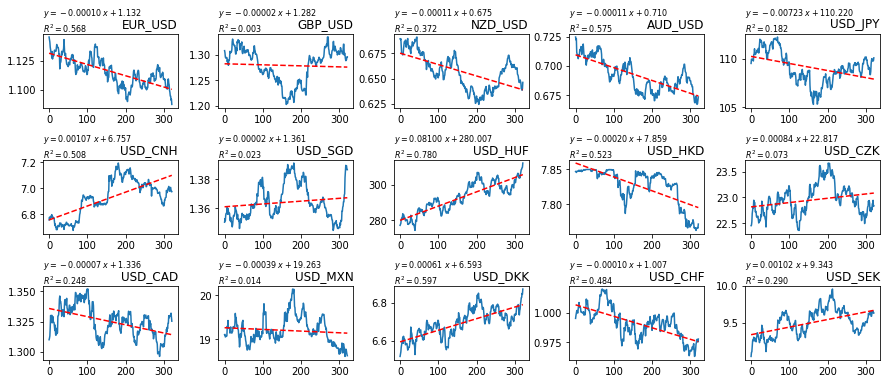

In [7]:
# Graficas
x = np.arange(len(closes))
fig, axs = plt.subplots(3,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .7, wspace=.3)

data = np.arange(len(closes.columns))

for ax, d in zip(axs.ravel(), data):
    ax.plot(x, closes.iloc[:,d])
    Regresion_L(x, closes.iloc[:,d])
    ax.set_title(instrument[d], loc = 'right')

In [8]:
# Calcular la matriz de coefecientes de correlacion
corr = closes.corr()

# Visualizarlo
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,EUR_USD,GBP_USD,NZD_USD,AUD_USD,USD_JPY,USD_CNH,USD_SGD,USD_HUF,USD_HKD,USD_CZK,USD_CAD,USD_MXN,USD_DKK,USD_CHF,USD_SEK
EUR_USD,1,0.34,0.82,0.84,0.4,-0.76,-0.57,-0.95,0.3,-0.77,0.045,-0.23,-1,0.26,-0.84
GBP_USD,0.34,1,0.55,0.49,0.78,-0.58,-0.78,-0.26,-0.2,-0.6,0.0012,-0.61,-0.31,0.15,-0.54
NZD_USD,0.82,0.55,1,0.89,0.62,-0.89,-0.71,-0.8,0.045,-0.78,-0.0072,-0.43,-0.82,0.2,-0.92
AUD_USD,0.84,0.49,0.89,1,0.67,-0.89,-0.68,-0.86,0.31,-0.64,0.098,-0.34,-0.84,0.47,-0.86
USD_JPY,0.4,0.78,0.62,0.67,1,-0.81,-0.61,-0.44,0.097,-0.46,0.31,-0.56,-0.38,0.56,-0.55
USD_CNH,-0.76,-0.58,-0.89,-0.89,-0.81,1,0.66,0.79,-0.18,0.69,-0.24,0.49,0.76,-0.47,0.81
USD_SGD,-0.57,-0.78,-0.71,-0.68,-0.61,0.66,1,0.44,0.24,0.75,0.34,0.61,0.54,-0.021,0.73
USD_HUF,-0.95,-0.26,-0.8,-0.86,-0.44,0.79,0.44,1,-0.49,0.61,-0.23,0.091,0.96,-0.44,0.78
USD_HKD,0.3,-0.2,0.045,0.31,0.097,-0.18,0.24,-0.49,1,0.3,0.57,0.54,-0.33,0.72,-0.0014
USD_CZK,-0.77,-0.6,-0.78,-0.64,-0.46,0.69,0.75,0.61,0.3,1,0.26,0.63,0.75,0.12,0.81


In [9]:
resume_clos = closes.describe()
resume_clos

,EUR_USD,GBP_USD,NZD_USD,AUD_USD,USD_JPY,USD_CNH,USD_SGD,USD_HUF,USD_HKD,USD_CZK,USD_CAD,USD_MXN,USD_DKK,USD_CHF,USD_SEK
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000
mean,1.116073,1.279020,0.657142,0.692098,109.060525,6.928706,1.364255,293.006708,7.827182,22.951040,1.325013,19.200836,6.691125,0.991400,9.506540
std,0.011973,0.033452,0.017194,0.013438,1.578256,0.139566,0.011873,8.537795,0.025695,0.287915,0.012573,0.306203,0.073375,0.013097,0.175881
min,1.087540,1.202800,0.624610,0.667350,105.315000,6.676630,1.344840,274.285000,7.762320,22.360400,1.296340,18.607500,6.516900,0.963110,9.051630
25%,1.107442,1.252938,0.641880,0.681225,108.103250,6.801473,1.355163,286.112250,7.817335,22.731535,1.315892,19.006415,6.639050,0.982077,9.357045
50%,1.115700,1.289690,0.658860,0.690100,108.870000,6.934840,1.361260,293.323500,7.839150,22.929585,1.325310,19.142010,6.693510,0.991885,9.515730
75%,1.124695,1.305253,0.669983,0.702155,110.025000,7.042580,1.373672,300.074000,7.846357,23.124562,1.333222,19.395003,6.745002,0.999988,9.638758
max,1.145620,1.334640,0.691180,0.724880,112.202000,7.194680,1.391310,312.592000,7.850050,23.668170,1.351790,20.145020,6.870840,1.020580,9.955680


# Conteo de Velas

Más estadistico

La granularidad mas pequeña se vuelve mas caotico, analisis tecnico funciona mas en periodicidades de una hora


In [10]:
# Función que recupera los precios de apertura
def Open(df):
    return df['Open']

# Importante: Open y Close son arrays del mismo tamaño (HandleExcepcion)
def Tendency(Open, Clos):
    tendencia = ['alcista' if Clos[i] >= Open[i] else 'bajista' for i in range(len(Open))]
    return tendencia

In [13]:
# Se necesitan tanto precio de cierre, como de apertura para poder decir si fue alcista o bajista el dia, en este caso
opens = pd.DataFrame([Open(Data_day[i]) for i in range(len(Data_day))]).transpose()
# Nombres de las divisas utilizadas
opens.columns = instrument

# Utilizar funcion de tendencia en los instrumentos
tendencia = pd.DataFrame([Tendency(opens.iloc[:,i], closes.iloc[:,i]) for i in range(len(opens.columns))]).transpose()
tendencia.columns = instrument
tendencia

,EUR_USD,GBP_USD,NZD_USD,AUD_USD,USD_JPY,USD_CNH,USD_SGD,USD_HUF,USD_HKD,USD_CZK,USD_CAD,USD_MXN,USD_DKK,USD_CHF,USD_SEK
0,bajista,bajista,bajista,bajista,bajista,alcista,bajista,bajista,bajista,alcista,alcista,alcista,alcista,alcista,bajista
1,bajista,bajista,bajista,bajista,alcista,alcista,alcista,alcista,bajista,alcista,alcista,alcista,alcista,alcista,alcista
2,bajista,bajista,alcista,alcista,alcista,bajista,bajista,alcista,bajista,alcista,alcista,bajista,alcista,alcista,alcista
3,bajista,bajista,bajista,bajista,alcista,alcista,alcista,alcista,alcista,alcista,alcista,alcista,alcista,alcista,alcista
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,bajista,alcista,alcista,bajista,bajista,alcista,bajista,alcista,alcista,bajista,alcista,bajista,alcista,alcista,alcista
319,bajista,alcista,bajista,alcista,alcista,bajista,bajista,alcista,alcista,alcista,alcista,bajista,alcista,alcista,bajista
320,alcista,alcista,alcista,alcista,alcista,bajista,bajista,alcista,bajista,bajista,bajista,bajista,bajista,bajista,bajista
321,bajista,alcista,alcista,alcista,alcista,alcista,alcista,alcista,alcista,alcista,bajista,bajista,alcista,alcista,alcista


In [14]:
''' Función Consecutively

    Función para ver la cosecutividad de la tendencia
    
    Parámetro: tendencia. Vector que sólo contiene 'alcista' o 'bajista'
''' 

def Consecutively(tendencia):
    count = [0]
    
    def conteo(count, a, b):
        if a == b:
            if a is 'alcista':
                count += 1
            else:
                count -= 1
        else:
            count = 0
        return  count
    
    temp = [count.append(conteo(count[i], tendencia[i], tendencia[i+1])) for i in range(len(tendencia)-1)]
    return count

In [15]:
# Utilizando la funcion anterior, te regresa el numero consecutivo que se ha acumulado antes de que cambie de tendencia
consecut = pd.DataFrame([Consecutively(tendencia.iloc[:,i]) for i in range(len(tendencia.columns))]).transpose()
consecut.columns = instrument
consecut

,EUR_USD,GBP_USD,NZD_USD,AUD_USD,USD_JPY,USD_CNH,USD_SGD,USD_HUF,USD_HKD,USD_CZK,USD_CAD,USD_MXN,USD_DKK,USD_CHF,USD_SEK
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-1,-1,-1,-1,0,1,0,0,-1,1,1,1,1,1,0
2,-2,-2,0,0,1,0,0,1,-2,2,2,0,2,2,1
3,-3,-3,0,0,2,0,0,2,0,3,3,0,3,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,-5,0,0,-2,-1,2,0,3,2,0,3,0,5,6,2
319,-6,1,0,0,0,0,-1,4,3,0,4,-1,6,7,0
320,0,2,0,1,1,-1,-2,5,0,0,0,-2,0,0,-1
321,0,3,1,2,2,0,0,6,0,0,-1,-3,0,0,0


De estos ver el máximo de dias que estuvo alcista y bajista

In [16]:
# Ver cual es el maximo de dias que cada divisa estuvo subiendo consecutivamante y cuantos bajando
df_consecut = pd.DataFrame(index = instrument, columns = ['Maximo_Alcista', 'Maximo_Bajista'])

df_consecut['Maximo_Alcista'] = [consecut.iloc[:,i].max() for i in range(len(consecut.columns))]
df_consecut['Maximo_Bajista'] = [consecut.iloc[:,i].min() for i in range(len(consecut.columns))]

with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(df_consecut)

         Maximo_Alcista  Maximo_Bajista
EUR_USD               4              -7
GBP_USD               7             -11
NZD_USD               7              -5
AUD_USD               5              -7
USD_JPY               8              -4
USD_CNH               5              -4
USD_SGD               8              -7
USD_HUF               6              -5
USD_HKD               6              -4
USD_CZK              10              -6
USD_CAD               6              -5
USD_MXN               4              -8
USD_DKK               7              -4
USD_CHF               7              -5
USD_SEK               5              -9


# Graficas de Histogramas


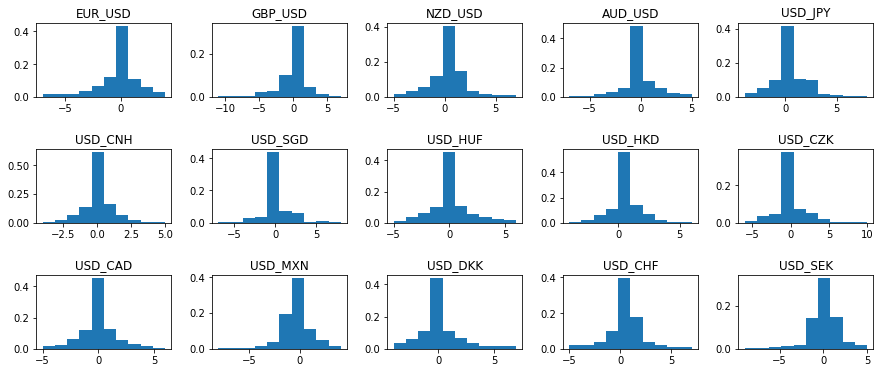

In [17]:
fig, axs = plt.subplots(3,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .7, wspace=.3)

data = np.arange(len(closes.columns))

for ax, d in zip(axs.ravel(), data):
    ax.hist(consecut.iloc[:,d], density = True)
    ax.set_title(instrument[d], loc = 'center')


EJEMPLO

In [19]:
#Ejemplo, ver cuantas veces se repitió más de 3 veces
mas_tres = pd.DataFrame([len([1 for x in range(len(consecut)) if abs(consecut.iloc[:,i][x]) >= 3]) 
                     for i in range(len(consecut.columns))]).rename(index = lambda x: instrument[x])

# En porcentaje
mas_tres_p = mas_tres/len(tendencia)*100
mas_tres_p.columns = ['En %']

# Ver el dataframe completo 
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(mas_tres_p.sort_values(by = 'En %'))


              En %
USD_CNH   5.900621
USD_HKD   6.832298
USD_CAD  10.248447
USD_MXN  10.248447
USD_JPY  11.180124
USD_SGD  11.801242
EUR_USD  13.043478
NZD_USD  13.354037
USD_SEK  13.354037
USD_HUF  13.664596
USD_DKK  13.664596
AUD_USD  14.285714
USD_CZK  14.906832
USD_CHF  14.906832
GBP_USD  16.770186


Entonces podemos decir que el ultimo 'GBP_USD' mantuvo mayor consistencia en consecutividad, ya que 16% de las veces fue 3 o mayor las veces que se repitió (Ya sea bajista o alcista) 

# Fechas (Dias)


In [20]:
def TimeStamp(df):
    return df['TimeStamp']

time = pd.DataFrame([TimeStamp(Data_day[i]) for i in range(len(Data_day))]).transpose()
time.columns = instrument

Debido a que la función de Divisa solo se marca un periodo de fechas y este se utiliza para todas las divisas, es evidente que compartiran todas el mismo tiempo, lo cual hace posible una mejor comparación. 

In [21]:
#day = pd.DataFrame([[time.iloc[i, j].weekday() for i in range(len(time))] for j in range(len(time.columns))]).transpose()
day = pd.DataFrame([time.iloc[i, 0].weekday() for i in range(len(time))])


In [22]:
consecut['Days'] = day

cons_day = [consecut.groupby('Days')[i].value_counts().unstack(level = -1).fillna(0) for i in instrument]

with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(cons_day[3])

AUD_USD   -7   -6   -5   -4   -3   -2    -1     0    1    2    3    4    5
Days                                                                      
0        0.0  0.0  1.0  1.0  1.0  3.0  12.0  23.0  7.0  2.0  3.0  1.0  0.0
1        0.0  1.0  0.0  1.0  2.0  8.0   5.0  28.0  4.0  4.0  0.0  1.0  0.0
2        1.0  0.0  1.0  1.0  6.0  4.0  10.0  18.0  9.0  2.0  1.0  0.0  0.0
3        0.0  1.0  0.0  4.0  1.0  5.0   5.0  20.0  8.0  6.0  2.0  1.0  0.0
4        0.0  0.0  1.0  0.0  2.0  3.0   1.0  28.0  9.0  5.0  3.0  1.0  1.0
6        0.0  0.0  0.0  1.0  1.0  1.0   8.0  29.0  5.0  4.0  2.0  2.0  1.0


In [23]:
#Para que tengas la misma dimension todas las divisas
temp = pd.concat([cons_day[i] for i in range(len(cons_day))], axis=0).fillna(0)

#with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    #print(temp.iloc[0:6,:])

In [24]:
#Verlo en porcentaje
cons_day_porc = [round(consecut.groupby('Days')[i].value_counts().unstack(level = -1).fillna(0)/len(tendencia), 2)*1
                 for i in instrument]

#with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
#    print(cons_day_porc[0])

# Bayes

Empezar con lo basico, simplemente viendo la probabilida dado el dia de que sea alcista, o bajista

In [25]:
# Crear una copia de la tencia 'alcista' o 'bajista'
tendency = tendencia.copy()

# Hacerlo booleano [0,1]
tendency.replace(to_replace = ['alcista', 'bajista'], value = [1, 0], inplace=True)

# Visualizar la media: si son negativos, tuvieron mas tendencia 'bajista'
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(tendency.mean()-0.5)

EUR_USD   -0.040373
GBP_USD   -0.034161
NZD_USD   -0.006211
AUD_USD   -0.012422
USD_JPY    0.040373
USD_CNH    0.021739
USD_SGD    0.012422
USD_HUF    0.015528
USD_HKD    0.021739
USD_CZK    0.000000
USD_CAD    0.003106
USD_MXN   -0.049689
USD_DKK    0.037267
USD_CHF    0.046584
USD_SEK    0.009317
dtype: float64


In [26]:
# Agregar la columna de dias, para ver en que dias subio, y en cuales bajo
tendency['Days'] = day

# Agrupar de acuerdo al dia y ver el porcentaje de probabilidad
tend_day = [round(tendency.groupby('Days')[i].value_counts().unstack(level = -1)/len(tendency),3) for i in instrument]

# Acomodarlo en un mismo DataFrame
tend_day = pd.concat([tend_day[i] for i in range(len(tend_day))], axis=1)

# Nombre de columnas para diferenciar divisas y tendencia
tend_day.columns = np.array([[(stri + "% d")%d for d in range(2)] for stri in instrument]).flatten() 

tend_day

,EUR_USD 0,EUR_USD 1,GBP_USD 0,GBP_USD 1,NZD_USD 0,NZD_USD 1,AUD_USD 0,AUD_USD 1,USD_JPY 0,USD_JPY 1,...,USD_CAD 0,USD_CAD 1,USD_MXN 0,USD_MXN 1,USD_DKK 0,USD_DKK 1,USD_CHF 0,USD_CHF 1,USD_SEK 0,USD_SEK 1
Days,,,,,,,,,,,,,,,,,,,,,
0,0.093,0.075,0.081,0.087,0.078,0.090,0.090,0.078,0.078,0.090,...,0.087,0.081,0.087,0.081,0.068,0.099,0.075,0.093,0.090,0.078
1,0.102,0.065,0.087,0.081,0.093,0.075,0.102,0.065,0.071,0.096,...,0.068,0.099,0.096,0.071,0.065,0.102,0.068,0.099,0.087,0.081
2,0.084,0.081,0.096,0.068,0.090,0.075,0.096,0.068,0.090,0.075,...,0.084,0.081,0.084,0.081,0.081,0.084,0.068,0.096,0.068,0.096
3,0.078,0.087,0.087,0.078,0.075,0.090,0.065,0.099,0.096,0.068,...,0.087,0.078,0.102,0.062,0.087,0.078,0.096,0.068,0.090,0.075
4,0.106,0.062,0.084,0.084,0.075,0.093,0.065,0.102,0.071,0.096,...,0.090,0.078,0.112,0.056,0.071,0.096,0.062,0.106,0.084,0.084
6,0.078,0.090,0.099,0.068,0.096,0.071,0.093,0.075,0.053,0.115,...,0.081,0.087,0.068,0.099,0.090,0.078,0.084,0.084,0.071,0.096


In [27]:
# Ejemplo: Lunes
def compare(bajista, alcista):
    if alcista > bajista:
        return 'comprar'
    else:
        return 'vender'

temp = pd.DataFrame([[compare(tend_day.iloc[j,i], tend_day.iloc[j,i+1]) 
         for i in range(0, len(tend_day.columns), 2)]for j in range(len(tend_day))])

temp.columns = instrument
temp

,EUR_USD,GBP_USD,NZD_USD,AUD_USD,USD_JPY,USD_CNH,USD_SGD,USD_HUF,USD_HKD,USD_CZK,USD_CAD,USD_MXN,USD_DKK,USD_CHF,USD_SEK
0,vender,comprar,comprar,vender,comprar,vender,comprar,comprar,comprar,vender,vender,vender,comprar,comprar,vender
1,vender,vender,vender,vender,comprar,vender,comprar,comprar,vender,comprar,comprar,vender,comprar,comprar,vender
2,vender,vender,vender,vender,vender,vender,comprar,comprar,vender,comprar,vender,vender,comprar,comprar,comprar
3,comprar,vender,comprar,comprar,vender,vender,vender,vender,comprar,vender,vender,vender,vender,vender,vender
4,vender,vender,comprar,comprar,comprar,comprar,comprar,vender,comprar,vender,vender,vender,comprar,comprar,vender
5,comprar,vender,vender,vender,comprar,comprar,vender,vender,comprar,comprar,comprar,comprar,vender,vender,comprar



- [Optimización Bayesiana]('https://github.com/fmfn/BayesianOptimization')
